Enter initial balance: 25000
Enter stock allocation percentage (e.g., 0.5 for 50%): 0.45
Enter bond allocation percentage (e.g., 0.3 for 30%): 0.35
Enter oil allocation percentage (e.g., 0.2 for 20%): 0.2


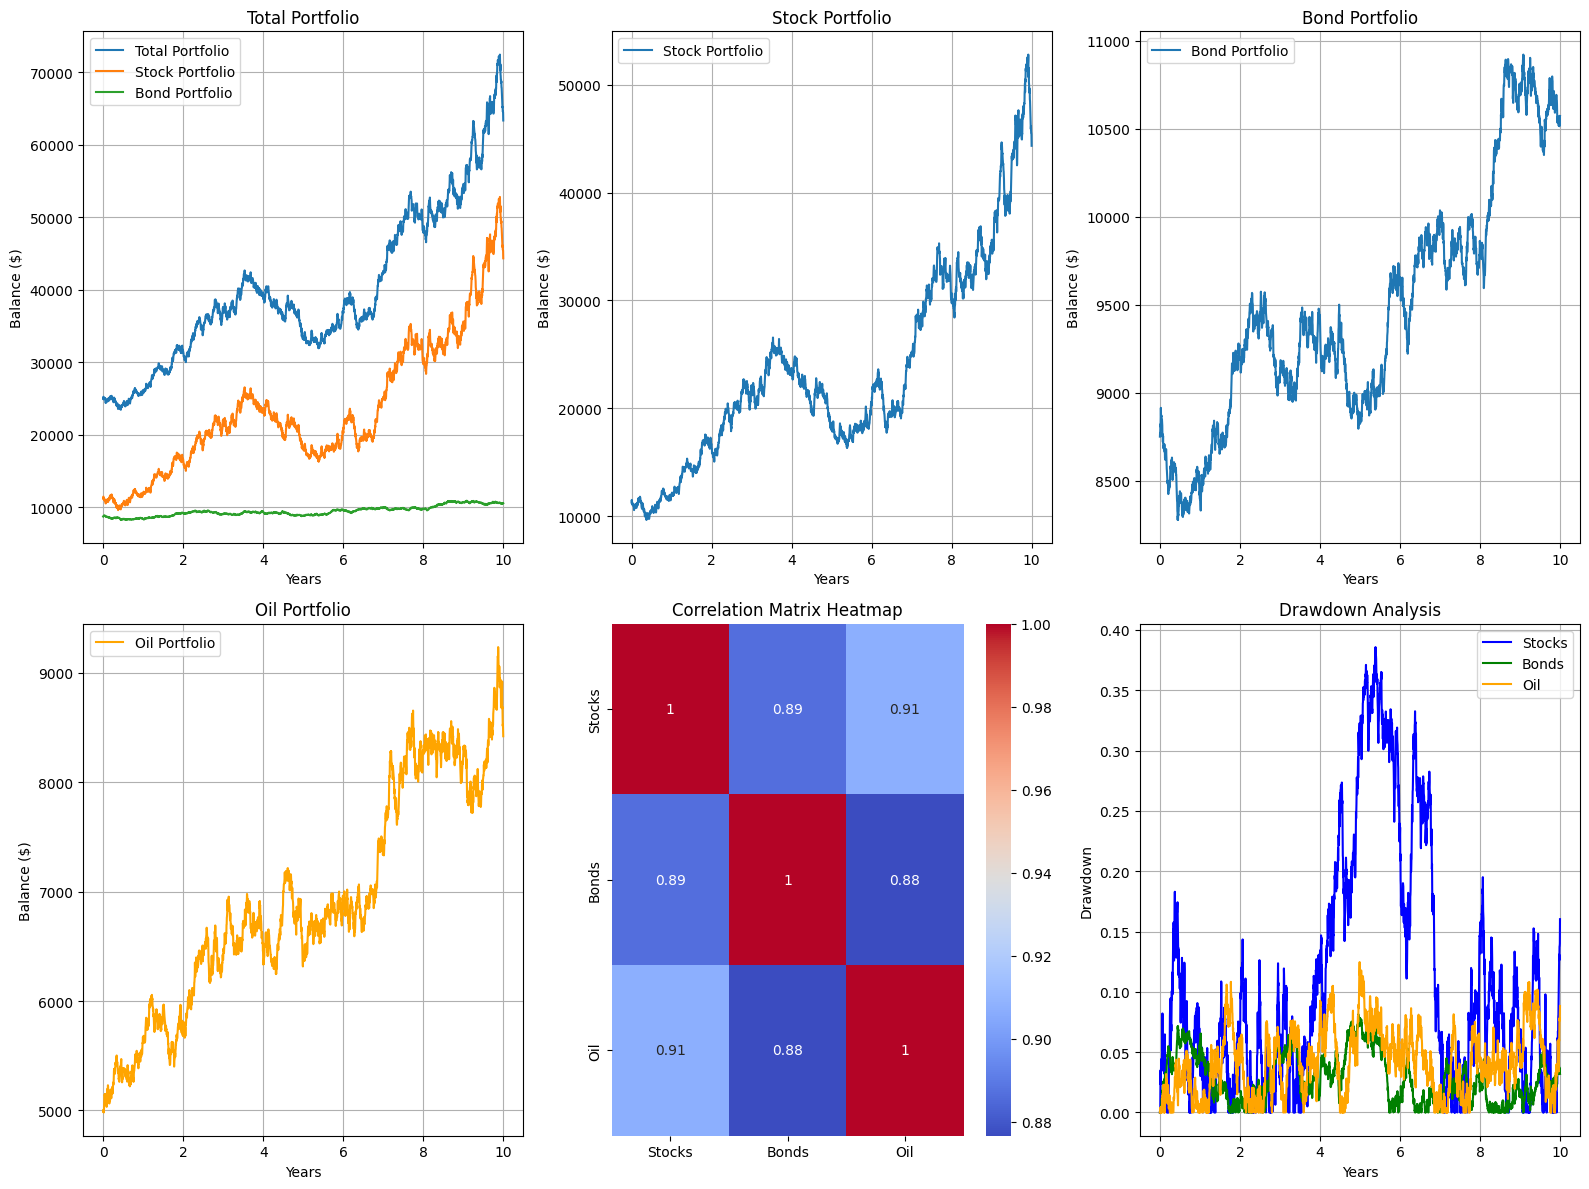

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Portfolio:
    def __init__(self, initial_balance, stock_allocation, bond_allocation, oil_allocation):
        self.initial_balance = initial_balance
        self.stock_allocation = stock_allocation
        self.bond_allocation = bond_allocation
        self.oil_allocation = oil_allocation
        self.balance = initial_balance
        self.stock_balance = initial_balance * stock_allocation
        self.bond_balance = initial_balance * bond_allocation
        self.oil_balance = initial_balance * oil_allocation

    def simulate_growth(self, num_years, num_steps_per_year, stock_mu, stock_sigma, bond_mu, bond_sigma, oil_mu, oil_sigma):
        dt = 1 / num_steps_per_year
        balance_path = [self.balance]
        stock_balance_path = [self.stock_balance]
        bond_balance_path = [self.bond_balance]
        oil_balance_path = [self.oil_balance]
        for _ in range(num_years * num_steps_per_year):
            stock_growth = stock_mu * dt * self.stock_balance + stock_sigma * np.sqrt(dt) * self.stock_balance * np.random.normal(0, 1)
            bond_growth = bond_mu * dt * self.bond_balance + bond_sigma * np.sqrt(dt) * self.bond_balance * np.random.normal(0, 1)
            oil_growth = oil_mu * dt * self.oil_balance + oil_sigma * np.sqrt(dt) * self.oil_balance * np.random.normal(0, 1)
            self.stock_balance += stock_growth
            self.bond_balance += bond_growth
            self.oil_balance += oil_growth
            self.balance = self.stock_balance + self.bond_balance + self.oil_balance
            balance_path.append(self.balance)
            stock_balance_path.append(self.stock_balance)
            bond_balance_path.append(self.bond_balance)
            oil_balance_path.append(self.oil_balance)
        return balance_path, stock_balance_path, bond_balance_path, oil_balance_path

class StockPortfolio(Portfolio):
    def __init__(self, initial_balance):
        super().__init__(initial_balance, 1.0, 0.0, 0.0)

class BondPortfolio(Portfolio):
    def __init__(self, initial_balance):
        super().__init__(initial_balance, 0.0, 1.0, 0.0)

class OilPortfolio(Portfolio):
    def __init__(self, initial_balance):
        super().__init__(initial_balance, 0.0, 0.0, 1.0)

class MixedPortfolio(Portfolio):
    def __init__(self, initial_balance, stock_allocation, bond_allocation, oil_allocation):
        super().__init__(initial_balance, stock_allocation, bond_allocation, oil_allocation)

def plot_results(years, balance_paths, labels):
    num_steps = len(balance_paths[0])
    num_steps_per_year = num_steps // years

    plt.figure(figsize=(16, 12))

    # Plot total portfolio balance
    plt.subplot(2, 3, 1)
    for i, balance_path in enumerate(balance_paths[:-1]):  # Excluding oil for clarity
        plt.plot(np.arange(num_steps) / num_steps_per_year, balance_path, label=labels[i])
    plt.title("Total Portfolio")
    plt.xlabel("Years")
    plt.ylabel("Balance ($)")
    plt.legend()
    plt.grid(True)

    # Plot stock balance
    plt.subplot(2, 3, 2)
    plt.plot(np.arange(num_steps) / num_steps_per_year, balance_paths[1], label=labels[1])
    plt.title("Stock Portfolio")
    plt.xlabel("Years")
    plt.ylabel("Balance ($)")
    plt.legend()
    plt.grid(True)

    # Plot bond balance
    plt.subplot(2, 3, 3)
    plt.plot(np.arange(num_steps) / num_steps_per_year, balance_paths[2], label=labels[2])
    plt.title("Bond Portfolio")
    plt.xlabel("Years")
    plt.ylabel("Balance ($)")
    plt.legend()
    plt.grid(True)

    # Plot oil balance
    plt.subplot(2, 3, 4)
    plt.plot(np.arange(num_steps) / num_steps_per_year, balance_paths[3], label=labels[3], color='orange')
    plt.title("Oil Portfolio")
    plt.xlabel("Years")
    plt.ylabel("Balance ($)")
    plt.legend()
    plt.grid(True)

    # 1. Correlation Matrix Heatmap
    # Calculate correlations between asset balances
    asset_balances = np.array([balance_paths[1], balance_paths[2], balance_paths[3]])
    correlation_matrix = np.corrcoef(asset_balances)

    # Plot correlation matrix heatmap
    plt.subplot(2, 3, 5)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Stocks', 'Bonds', 'Oil'], yticklabels=['Stocks', 'Bonds', 'Oil'])
    plt.title('Correlation Matrix Heatmap')

    # 2. Drawdown Analysis
    # Calculate drawdowns
    def calculate_drawdown(balance_path):
        peak = balance_path[0]
        drawdowns = []
        for balance in balance_path:
            if balance > peak:
                peak = balance
            drawdown = (peak - balance) / peak
            drawdowns.append(drawdown)
        return drawdowns

    # Calculate drawdowns for each asset
    stock_drawdowns = calculate_drawdown(balance_paths[1])
    bond_drawdowns = calculate_drawdown(balance_paths[2])
    oil_drawdowns = calculate_drawdown(balance_paths[3])

    # Plot drawdowns
    plt.subplot(2, 3, 6)
    plt.plot(np.arange(num_years * num_steps_per_year + 1) / num_steps_per_year, stock_drawdowns, label='Stocks', color='blue')
    plt.plot(np.arange(num_years * num_steps_per_year + 1) / num_steps_per_year, bond_drawdowns, label='Bonds', color='green')
    plt.plot(np.arange(num_years * num_steps_per_year + 1) / num_steps_per_year, oil_drawdowns, label='Oil', color='orange')
    plt.title('Drawdown Analysis')
    plt.xlabel('Years')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
num_years = 10
num_steps_per_year = 252
stock_mu = 0.07  # Drift constant for stocks
stock_sigma = 0.2  # Standard deviation of returns for stocks
bond_mu = 0.03  # Drift constant for bonds
bond_sigma = 0.05  # Standard deviation of returns for bonds
oil_mu = 0.05  # Drift constant for oil
oil_sigma = 0.1  # Standard deviation of returns for oil

# Initial balance and allocation
initial_balance = float(input("Enter initial balance: "))
stock_allocation = float(input("Enter stock allocation percentage (e.g., 0.5 for 50%): "))
bond_allocation = float(input("Enter bond allocation percentage (e.g., 0.3 for 30%): "))
oil_allocation = float(input("Enter oil allocation percentage (e.g., 0.2 for 20%): "))

# Create mixed portfolio
mixed_portfolio = MixedPortfolio(initial_balance, stock_allocation, bond_allocation, oil_allocation)

# Simulate growth of portfolio
balance_path, stock_balance_path, bond_balance_path, oil_balance_path = mixed_portfolio.simulate_growth(num_years, num_steps_per_year, stock_mu, stock_sigma, bond_mu, bond_sigma, oil_mu, oil_sigma)

# Plot results
plot_results(num_years, [balance_path, stock_balance_path, bond_balance_path, oil_balance_path], ['Total Portfolio', 'Stock Portfolio', 'Bond Portfolio', 'Oil Portfolio'])
